In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading:

In [2]:
data = pd.read_csv('../_data/card_transdata.csv', low_memory=False)

In [3]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Visualization:

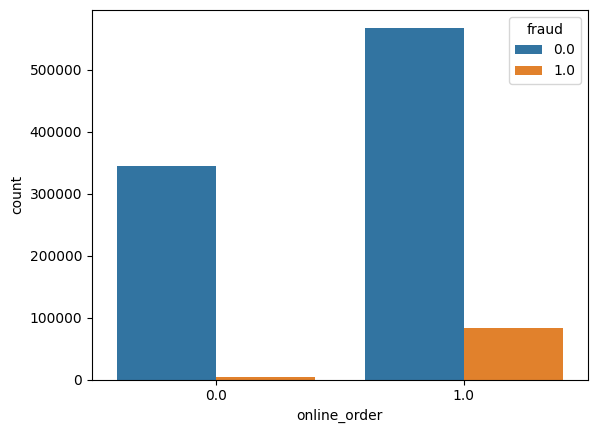

In [5]:
sns.countplot(x='online_order', data=data, hue='fraud');

<AxesSubplot: xlabel='repeat_retailer', ylabel='count'>

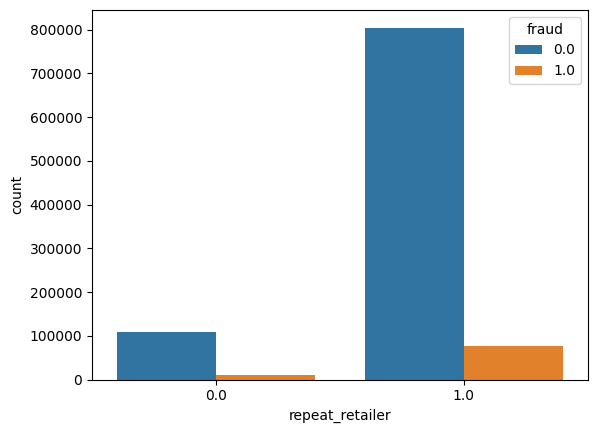

In [6]:
sns.countplot(x='repeat_retailer', data=data, hue='fraud')

<AxesSubplot: xlabel='distance_from_home', ylabel='Density'>

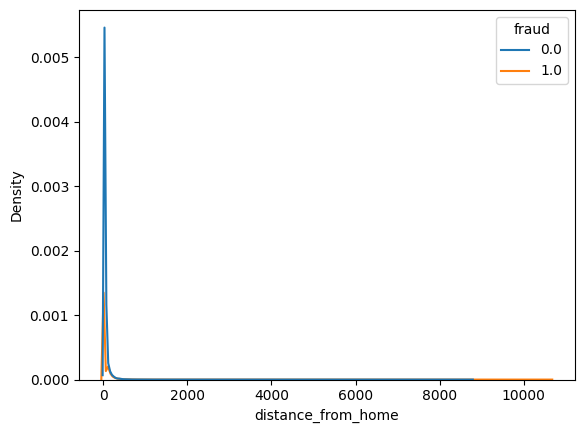

In [7]:
sns.kdeplot(x='distance_from_home', data=data, hue='fraud')

<AxesSubplot: xlabel='fraud', ylabel='distance_from_home'>

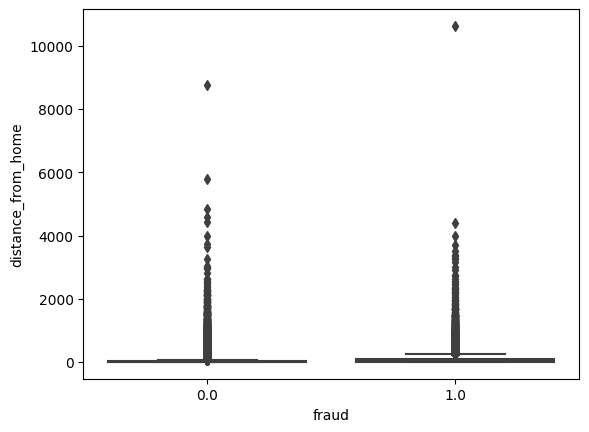

In [8]:
sns.boxplot(x='fraud', y='distance_from_home', data=data)

<AxesSubplot: xlabel='fraud', ylabel='distance_from_last_transaction'>

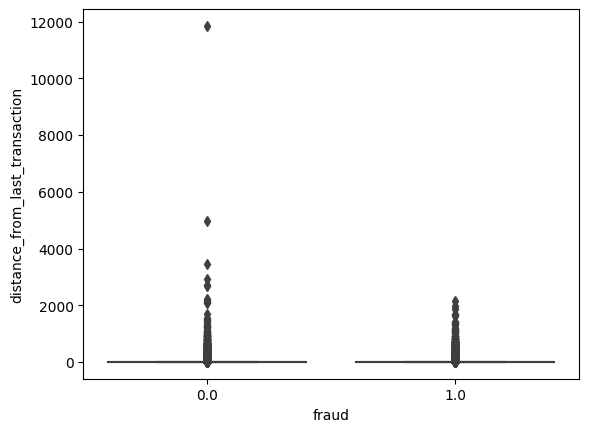

In [9]:
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=data)

<AxesSubplot: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

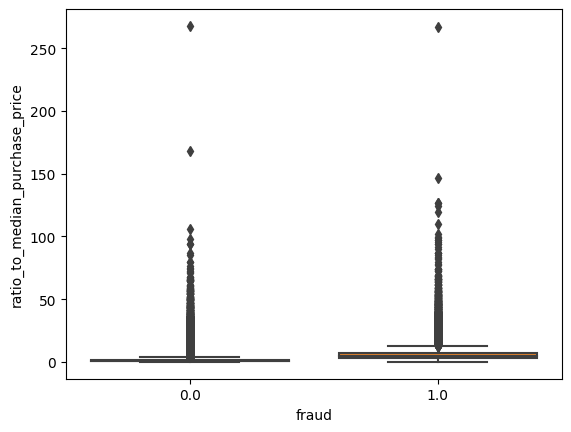

In [10]:
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=data)

<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

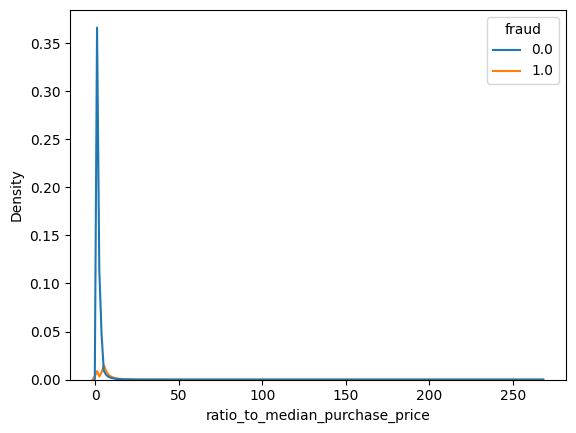

In [11]:
sns.kdeplot(x='ratio_to_median_purchase_price', data=data, hue='fraud')

# Classification:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(columns=['fraud'])
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_train.shape, y_train.shape

((700000, 7), (700000,))

In [15]:
X_test.shape, y_test.shape

((300000, 7), (300000,))

In [16]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC

$X_i = [1, x^{i}_1, \dots, x^{i}_n]$, $\beta = [\beta_0, \cdots, \beta_n]^T$
$$y_i = \frac{1}{1+ \exp{-\beta X_i}}$$
$$L = - \sum_{i=1}^{N}y_i \log(y^{true}_i) + (1-y_i) \log(1 - y^{true}_i)$$

In [17]:
clfs = [('DTC', DTC(criterion='gini')),
        ('RFC', RFC(criterion='gini', n_estimators=10)),
        ('LR', LR()),
        ('GNB', GNB())]

In [18]:
for i in range(len(clfs)):
    print(clfs[i][0] + ' is fitting ...')
    clfs[i][1].fit(X_train, y_train)

DTC is fitting ...
RFC is fitting ...
LR is fitting ...
GNB is fitting ...


/Users/khamir/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_pred = []
for i in range(len(clfs)):
    print(clfs[i][0] + ' is predicting ...')
    y_pred.append(clfs[i][1].predict(X_test))

DTC is predicting ...
RFC is predicting ...
LR is predicting ...
GNB is predicting ...


# Model evaluation:

In [20]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [30]:
for i in range(len(clfs)):
    print(clfs[i][0] + ' performance:', end=' ')
    print('ACC =', accuracy_score(y_true=y_test, y_pred=y_pred[i]), end=' / ')
    print('REC =', recall_score(y_true=y_test, y_pred=y_pred[i]), end=' / ')
    print('PRE =', precision_score(y_true=y_test, y_pred=y_pred[i]))

DTC performance: ACC = 0.99998 / REC = 0.9998472232831717 / PRE = 0.9999236058059587
RFC performance: ACC = 0.99998 / REC = 0.9998090291039645 / PRE = 0.99996179998472
LR performance: ACC = 0.95549 / REC = 0.5663050951035062 / PRE = 0.8812481426448737
GNB performance: ACC = 0.95141 / REC = 0.6037353907264533 / PRE = 0.7899945024738868
